In [6]:
from umap import UMAP

In [65]:
import os
import glob
import torch
from sklearn.cluster import DBSCAN, AgglomerativeClustering, KMeans
import umap
import matplotlib.pyplot as plt
import numpy as np
from yellowbrick.cluster import KElbowVisualizer
import warnings
warnings.filterwarnings('ignore')

In [66]:
folder_path = "vectorized_torch_emb"

In [67]:
word_embeddings = []

for filename in os.listdir(folder_path):
    if filename.endswith('.pt'):
        embeddings = torch.load(os.path.join(folder_path, filename)).mean(dim=0).unsqueeze(0)
        word_embeddings.append(embeddings)

word_embeddings = torch.cat(word_embeddings, dim=0)

In [68]:
word_embeddings.shape

torch.Size([218, 768])

In [69]:
embeddings_list = word_embeddings.detach().numpy()

In [70]:
embeddings_list[:10]

array([[-0.26431593, -0.02421799,  0.3157212 , ...,  0.00957637,
        -0.3250544 ,  0.35242242],
       [-0.26431593, -0.02421799,  0.3157212 , ...,  0.00957637,
        -0.3250544 ,  0.35242242],
       [-0.26431593, -0.02421799,  0.3157212 , ...,  0.00957637,
        -0.3250544 ,  0.35242242],
       ...,
       [-0.26431593, -0.02421799,  0.3157212 , ...,  0.00957637,
        -0.3250544 ,  0.35242242],
       [-0.26431593, -0.02421799,  0.3157212 , ...,  0.00957637,
        -0.3250544 ,  0.35242242],
       [-0.26431593, -0.02421799,  0.3157212 , ...,  0.00957637,
        -0.3250544 ,  0.35242242]], dtype=float32)

In [71]:
embeddings_list.shape

(218, 768)

In [72]:
#UMAP dimensionality reduction
umap_embeddings = umap.UMAP(n_neighbors=15, min_dist=0.00000001, n_components=2, metric = "cosine").fit_transform(embeddings_list)

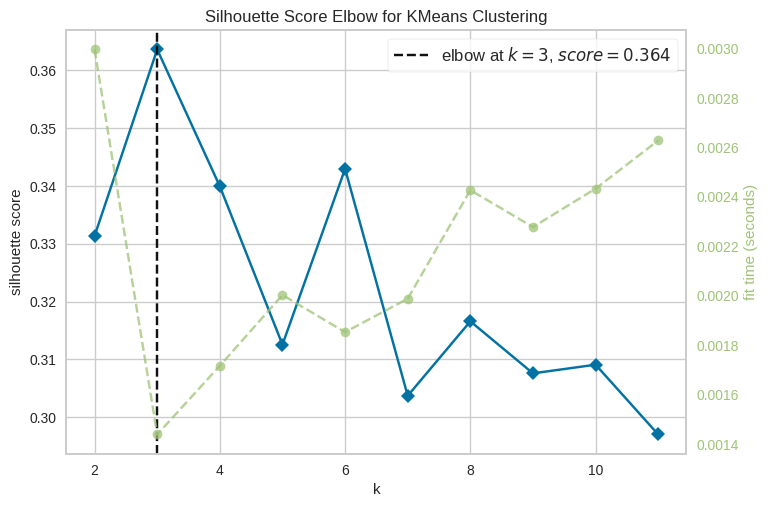

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [73]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=11,metric='silhouette', timings= True)
visualizer.fit(umap_embeddings)
visualizer.show()

### DBSCAN

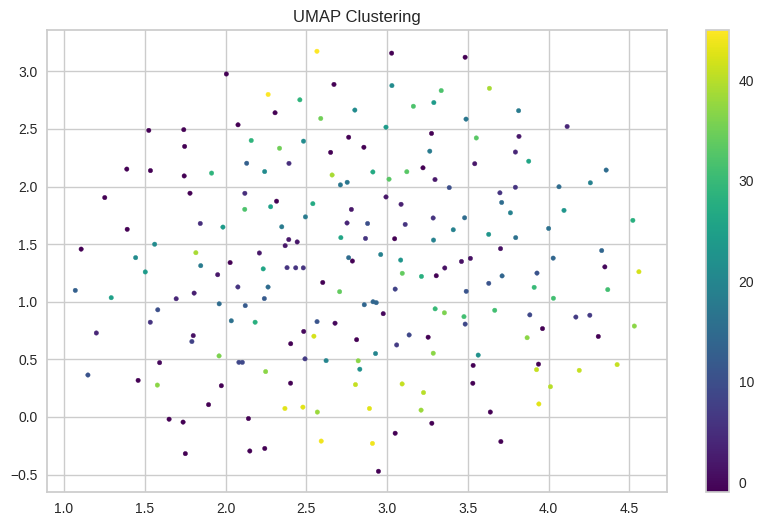

In [74]:
# DBSCAN stuff
dbscan = DBSCAN(eps=0.00001, min_samples=2, metric="cosine")
clustersdbscan = dbscan.fit_predict(umap_embeddings)
# Visualize
plt.figure(figsize=(10, 6))
plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], c=clustersdbscan, cmap='viridis', s=10)
plt.title('UMAP Clustering')
plt.colorbar()
plt.show()

### Agglomerative Clustering

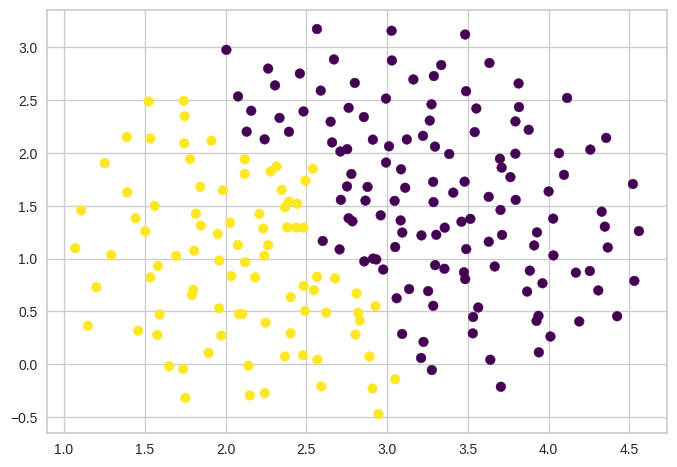

In [75]:
c = AgglomerativeClustering(n_clusters=2).fit(umap_embeddings)
plt.scatter(umap_embeddings[:,0], umap_embeddings[:,1], c=c.labels_, cmap='viridis');

In [76]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report

In [77]:
X_train, X_test, y_train, y_test = train_test_split(umap_embeddings, c.labels_, test_size=0.3, random_state=42)

In [78]:
X_train

array([[ 3.7949324 ,  2.2995057 ],
       [ 3.7098253 ,  1.8616858 ],
       [ 1.9740835 ,  0.27080214],
       [ 2.4791164 ,  0.08484875],
       [ 2.9287384 ,  0.55002666],
       [ 2.443696  ,  1.5190076 ],
       [ 3.5644693 ,  0.53670335],
       [ 3.0470893 ,  1.5465522 ],
       [ 2.2792985 ,  1.8245877 ],
       [ 3.2773492 , -0.05517174],
       [ 1.7799883 ,  1.9418315 ],
       [ 2.0764787 ,  1.1280481 ],
       [ 2.3808236 ,  1.295797  ],
       [ 3.76386   ,  1.7717373 ],
       [ 1.5918943 ,  0.4708322 ],
       [ 3.2544904 ,  0.6918984 ],
       [ 2.7855525 ,  1.3532946 ],
       [ 2.1503022 , -0.29582003],
       [ 2.334371  ,  2.3323388 ],
       [ 2.248396  ,  0.39352104],
       [ 2.348122  ,  1.6504077 ],
       [ 2.8666198 ,  1.5492965 ],
       [ 3.225844  ,  0.21116062],
       [ 2.8214676 ,  0.48719862],
       [ 1.9514153 ,  1.2345527 ],
       [ 3.0123498 ,  2.0638392 ],
       [ 2.6506875 ,  2.2965064 ],
       [ 2.3677883 ,  0.07333618],
       [ 1.6505705 ,

In [79]:
y_train

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [80]:
catboost_model = CatBoostClassifier(iterations=100, depth=5, learning_rate=0.01)
catboost_model.fit(X_train, y_train)

0:	learn: 0.6887197	total: 519us	remaining: 51.4ms
1:	learn: 0.6835666	total: 1.11ms	remaining: 54.7ms
2:	learn: 0.6788731	total: 1.39ms	remaining: 45ms
3:	learn: 0.6747571	total: 1.6ms	remaining: 38.4ms
4:	learn: 0.6708575	total: 1.88ms	remaining: 35.6ms
5:	learn: 0.6662822	total: 2.17ms	remaining: 33.9ms
6:	learn: 0.6619596	total: 2.42ms	remaining: 32.1ms
7:	learn: 0.6579085	total: 2.65ms	remaining: 30.5ms
8:	learn: 0.6536071	total: 2.94ms	remaining: 29.7ms
9:	learn: 0.6497842	total: 3.15ms	remaining: 28.3ms
10:	learn: 0.6457923	total: 3.43ms	remaining: 27.7ms
11:	learn: 0.6412918	total: 3.69ms	remaining: 27ms
12:	learn: 0.6368215	total: 4ms	remaining: 26.8ms
13:	learn: 0.6333658	total: 4.27ms	remaining: 26.2ms
14:	learn: 0.6291372	total: 4.49ms	remaining: 25.4ms
15:	learn: 0.6250663	total: 4.75ms	remaining: 25ms
16:	learn: 0.6217310	total: 5.03ms	remaining: 24.6ms
17:	learn: 0.6174338	total: 5.32ms	remaining: 24.2ms
18:	learn: 0.6131322	total: 5.55ms	remaining: 23.6ms
19:	learn: 0.6

In [81]:
y_pred = catboost_model.predict(X_test)

In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.97      1.00      0.98        28

    accuracy                           0.98        66
   macro avg       0.98      0.99      0.98        66
weighted avg       0.99      0.98      0.98        66



In [64]:
catboost_model.save_model('bi_model.catboost')